In [3]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from skimage.feature import graycomatrix, graycoprops
from sklearn.decomposition import PCA

# Path to dataset
base_path = "/content/drive/MyDrive/AAV data/Images/100 mV/1s_segment_trans/train_val_photos"

# Define classes (subfolders)
classes = ["Empty", "Single", "Double"]

# Initialize a list to store extracted features
data = []

# Feature extraction loop
for label in classes:
    class_path = os.path.join(base_path, label)
    for img_name in os.listdir(class_path):
        img_path = os.path.join(class_path, img_name)

        # Load the image
        img = cv2.imread(img_path)  # Read as BGR format
        img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Convert to grayscale

        # Compute basic pixel intensity statistics
        mean_intensity = np.mean(img_gray)
        std_intensity = np.std(img_gray)
        min_intensity = np.min(img_gray)
        max_intensity = np.max(img_gray)

        # Compute Histogram of pixel intensities
        hist = cv2.calcHist([img_gray], [0], None, [256], [0, 256]).flatten()

        # Compute Texture Features using Gray-Level Co-occurrence Matrix (GLCM)
        glcm = graycomatrix(img_gray, [1], [0], 256, symmetric=True, normed=True)
        contrast = graycoprops(glcm, 'contrast')[0, 0]
        energy = graycoprops(glcm, 'energy')[0, 0]

        # Store the features
        data.append([mean_intensity, std_intensity, min_intensity, max_intensity, contrast, energy, label])

# Create DataFrame
df = pd.DataFrame(data, columns=["Mean", "Std", "Min", "Max", "Contrast", "Energy", "Label"])
print(df.head())

# Save to CSV (optional)
df.to_csv("image_features.csv", index=False)


         Mean        Std  Min  Max    Contrast    Energy  Label
0  240.589850  47.187504   11  255  405.936558  0.818511  Empty
1  240.903249  46.897060   11  255  369.285619  0.843932  Empty
2  240.585671  47.188419   11  255  376.966125  0.827685  Empty
3  240.714432  47.117755   11  255  368.314520  0.839289  Empty
4  240.671462  47.197487   11  255  374.302834  0.835645  Empty



📊 Summary Statistics:
              Mean          Std          Min     Max     Contrast       Energy
count  2732.000000  2732.000000  2732.000000  2732.0  2732.000000  2732.000000
mean    239.294295    48.983334    11.005490   255.0   407.929794     0.825613
std       1.830039     2.207898     0.208671     0.0    66.265210     0.024403
min     228.924030    38.765756    10.000000   255.0   312.825759     0.698797
25%     239.141203    47.767823    11.000000   255.0   358.642720     0.814948
50%     239.832668    48.434659    11.000000   255.0   381.719448     0.833722
75%     240.227141    49.031560    11.000000   255.0   451.953309     0.842501
max     245.295611    60.680279    20.000000   255.0   776.980727     0.864876

📈 Skewness of Features:
Mean        -2.310603
Std          2.093463
Min         38.010308
Max               NaN
Contrast     1.221894
Energy      -1.403005
dtype: float64

📉 Kurtosis of Features:
Mean           6.716389
Std            5.870947
Min         1511.2869

/usr/local/lib/python3.11/dist-packages/pandas/core/apply.py:1081: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  results[i] = self.func(v, *self.args, **self.kwargs)
<ipython-input-5-a88367905647>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Label", data=df, palette="viridis")


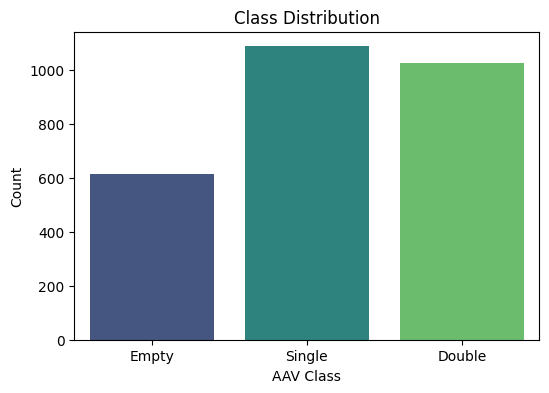

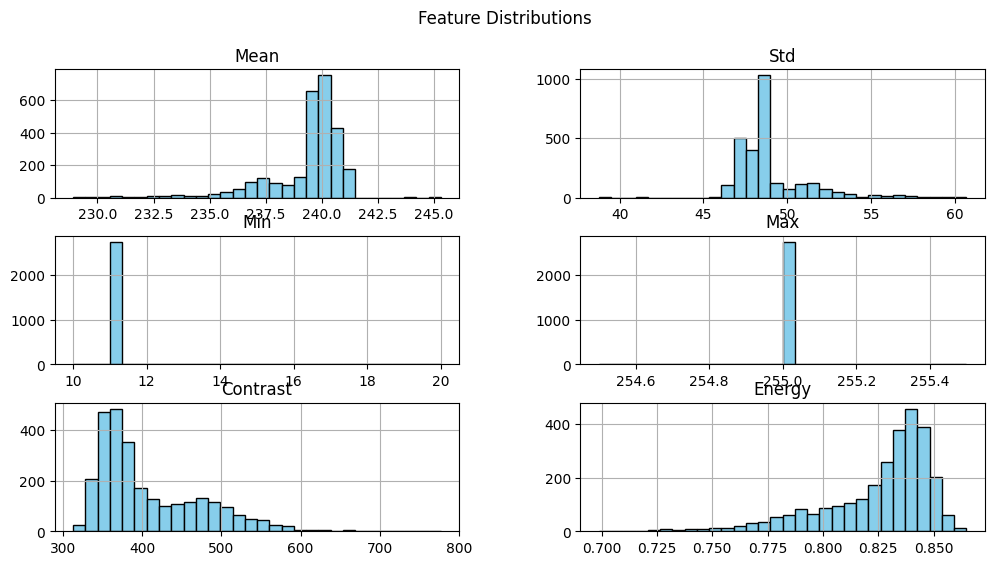

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis

# Load the extracted image feature dataset
df = pd.read_csv("image_features.csv")

# 📌 1️⃣ Summary Statistics
print("\n📊 Summary Statistics:")
print(df.describe())

# 📌 2️⃣ Skewness & Kurtosis (To Check Normality)
print("\n📈 Skewness of Features:")
print(df.iloc[:, :-1].apply(skew))  # Skewness for numerical features

print("\n📉 Kurtosis of Features:")
print(df.iloc[:, :-1].apply(kurtosis))  # Kurtosis for numerical features

# 📌 3️⃣ Class Distribution (Dataset Balance Check)
plt.figure(figsize=(6, 4))
sns.countplot(x="Label", data=df, palette="viridis")
plt.title("Class Distribution")
plt.xlabel("AAV Class")
plt.ylabel("Count")
plt.show()

# 📌 4️⃣ Histograms (Feature Distributions)
df.iloc[:, :-1].hist(bins=30, figsize=(12, 6), color="skyblue", edgecolor="black")
plt.suptitle("Feature Distributions")
plt.show()


In [7]:
#Inferential Analysis
from scipy.stats import f_oneway

# 📌 ANOVA Test (Only if data is normal)
for column in df.columns[:-1]:  # Exclude label column
    groups = [df[df["Label"] == label][column] for label in df["Label"].unique()]
    stat, p = f_oneway(*groups)
    print(f"{column}: ANOVA p-value = {p:.4f}")




Mean: ANOVA p-value = 0.0000
Std: ANOVA p-value = 0.0000
Min: ANOVA p-value = 0.3355
Max: ANOVA p-value = nan
Contrast: ANOVA p-value = 0.0000
Energy: ANOVA p-value = 0.0000


/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:531: ConstantInputWarning: Each of the input arrays is constant; the F statistic is not defined or infinite
  res = hypotest_fun_out(*samples, **kwds)
